In [ ]:
import IPython.display as ipd

ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100032-3-0-0.wav')

In [ ]:
ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100263-2-0-117.wav')

In [ ]:
ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav')

In [ ]:
ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav')

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

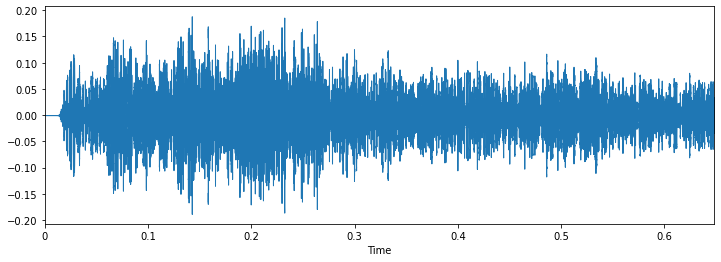

In [ ]:
#Street audio
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

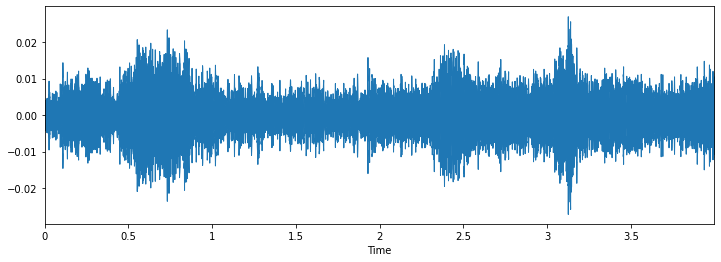

In [ ]:
#childeren_playing 
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100263-2-0-117.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

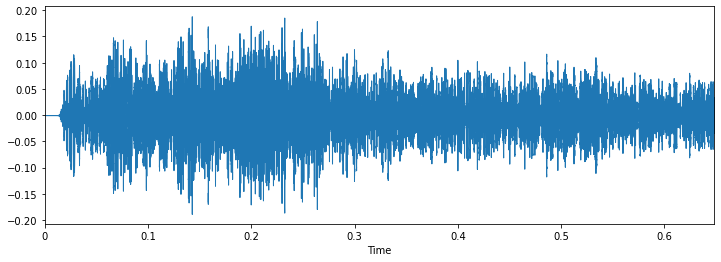

In [ ]:
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
import pandas as pd
metadata = pd.read_csv('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start  ...  fold  classID             class
0    100032-3-0-0.wav  100032    0.0  ...     5        3          dog_bark
1  100263-2-0-117.wav  100263   58.5  ...     5        2  children_playing
2  100263-2-0-121.wav  100263   60.5  ...     5        2  children_playing
3  100263-2-0-126.wav  100263   63.0  ...     5        2  children_playing
4  100263-2-0-137.wav  100263   68.5  ...     5        2  children_playing

[5 rows x 8 columns]

In [ ]:
metadata

slice_file_name    fsID       start  ...  fold  classID             class
0       100032-3-0-0.wav  100032    0.000000  ...     5        3          dog_bark
1     100263-2-0-117.wav  100263   58.500000  ...     5        2  children_playing
2     100263-2-0-121.wav  100263   60.500000  ...     5        2  children_playing
3     100263-2-0-126.wav  100263   63.000000  ...     5        2  children_playing
4     100263-2-0-137.wav  100263   68.500000  ...     5        2  children_playing
...                  ...     ...         ...  ...   ...      ...               ...
8727     99812-1-2-0.wav   99812  159.522205  ...     7        1          car_horn
8728     99812-1-3-0.wav   99812  181.142431  ...     7        1          car_horn
8729     99812-1-4-0.wav   99812  242.691902  ...     7        1          car_horn
8730     99812-1-5-0.wav   99812  253.209850  ...     7        1          car_horn
8731     99812-1-6-0.wav   99812  332.289233  ...     7        1          car_horn

[8732 rows x 8 columns]

In [ ]:
set(metadata['class'])

{'air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music'}

In [ ]:
print(metadata['class'].value_counts())

jackhammer          1000
street_music        1000
drilling            1000
dog_bark            1000
engine_idling       1000
air_conditioner     1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [ ]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

# from helpers.wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    print(file_name)
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold1/17592-5-0-0.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold1/17592-5-1-0.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold1/17592-5-1-1.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold1/17592-5-1-2.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold1/17592-5-1-3.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold4/176003-1-0-0.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold3/17615-3-0-0.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold3/17615-3-0-3.wav
/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio/fold3/17615-3-0-4.wav
/content/drive/MyDrive/Udacity

In [ ]:
audiodf

num_channels  sample_rate  bit_depth
0                2        44100         16
1                2        44100         16
2                2        44100         16
3                2        44100         16
4                2        44100         16
...            ...          ...        ...
8727             2        44100         16
8728             2        44100         16
8729             2        44100         16
8730             2        44100         16
8731             2        44100         16

[8732 rows x 3 columns]

In [ ]:
print(audiodf.num_channels.value_counts(normalize=True))

2    0.915369
1    0.084631
Name: num_channels, dtype: float64


In [ ]:
print(audiodf.sample_rate.value_counts(normalize=True))

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64


In [ ]:
print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64


In [ ]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate: 22050


In [ ]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -5668 to 6242
Librosa audio file min~max range: -0.17049879 to 0.18850903


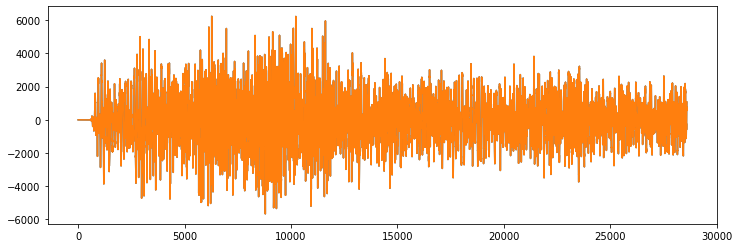

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

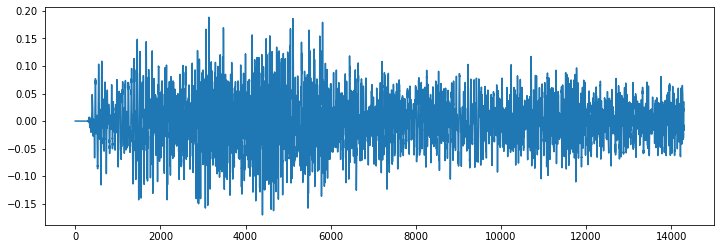

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 28)


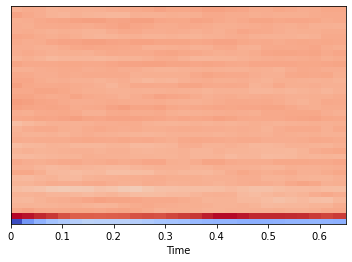

In [ ]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [ ]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", 'file')
        return None 
     
    return mfccsscaled

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/audio'

metadata = pd.read_csv('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound/UrbanSound8K/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


Finished feature extraction from  8732  files


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [ ]:

%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Udacity-ML-Capstone-master/Untitled Folder/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 3.9198 - accuracy: 0.1323 - val_loss: 2.2506 - val_accuracy: 0.1477

Epoch 00001: val_loss improved from inf to 2.25057, saving model to /content/drive/MyDrive/Udacity-ML-Capstone-master/Untitled Folder/weights.best.basic_mlp.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2497 - accuracy: 0.1528 - val_loss: 2.0711 - val_accuracy: 0.1900

Epoch 00002: val_loss improved from 2.25057 to 2.07106, saving model to /content/drive/MyDrive/Udacity-ML-Capstone-master/Untitled Folder/weights.best.basic_mlp.hdf5
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.1460 - accuracy: 0.1927 - val_loss: 2.0413 - val_accuracy: 0.2461

Epoch 00003: val_loss improved from 2.07106 to 2.04130, saving model to /content/drive/MyDrive/Udacity-ML-Capstone-master/Untitled Folder/weights.best.basic_mlp.hdf5
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss:

In [ ]:

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9707945585250854
Testing Accuracy:  0.9084144234657288


In [ ]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [ ]:
#car_horn
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100648-1-0-0.wav'
print_prediction(filename)

The predicted class is: car_horn 

air_conditioner 		 :  0.00000441194470113259740173816681
car_horn 		 :  0.99751770496368408203125000000000
children_playing 		 :  0.00004106954656890593469142913818
dog_bark 		 :  0.00112062564585357904434204101562
drilling 		 :  0.00001207410241477191448211669922
engine_idling 		 :  0.00000805944000603631138801574707
gun_shot 		 :  0.00002930850860138889402151107788
jackhammer 		 :  0.00000055306236390606500208377838
siren 		 :  0.00000485840928377001546323299408
street_music 		 :  0.00126141763757914304733276367188


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#children playing
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100263-2-0-117.wav'
print_prediction(filename)

The predicted class is: children_playing 

air_conditioner 		 :  0.00000020264766931177291553467512
car_horn 		 :  0.00000000091603108431925761578896
children_playing 		 :  0.99997663497924804687500000000000
dog_bark 		 :  0.00000150410596688743680715560913
drilling 		 :  0.00000009547289891997934319078922
engine_idling 		 :  0.00000296786902254098094999790192
gun_shot 		 :  0.00000005031864702687016688287258
jackhammer 		 :  0.00000000003579804508380135530388
siren 		 :  0.00000127528187476855237036943436
street_music 		 :  0.00001719769716146402060985565186


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#dog_bark
filename='/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/100032-3-0-0.wav'
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000331602256764540470612701
car_horn 		 :  0.00000016808297687020967714488506
children_playing 		 :  0.00005476471051224507391452789307
dog_bark 		 :  0.99926799535751342773437500000000
drilling 		 :  0.00000687756437400821596384048462
engine_idling 		 :  0.00000004501341166474048804957420
gun_shot 		 :  0.00012324634008109569549560546875
jackhammer 		 :  0.00000000001974993606157493530873
siren 		 :  0.00054585910402238368988037109375
street_music 		 :  0.00000102378351130028022453188896


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/102853-8-0-0.wav')

In [ ]:
#drilling
filename= '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/103199-4-0-0.wav'
print_prediction(filename)

The predicted class is: drilling 

air_conditioner 		 :  0.00000000546991607563995785312727
car_horn 		 :  0.00000063721381593495607376098633
children_playing 		 :  0.00000062001129208510974422097206
dog_bark 		 :  0.00000001918844461101798515301198
drilling 		 :  0.99942362308502197265625000000000
engine_idling 		 :  0.00000002712717162012268090620637
gun_shot 		 :  0.00000000003323558442347440688991
jackhammer 		 :  0.00000095129297505991416983306408
siren 		 :  0.00000000023522839232015257948660
street_music 		 :  0.00057412288151681423187255859375


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#Jackhammer
filename= '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/103074-7-0-0.wav'
print_prediction(filename)

The predicted class is: jackhammer 

air_conditioner 		 :  0.00000040137979340215679258108139
car_horn 		 :  0.00022429310774896293878555297852
children_playing 		 :  0.00000022000931210186536191031337
dog_bark 		 :  0.00000168073336226370884105563164
drilling 		 :  0.00131288473494350910186767578125
engine_idling 		 :  0.00000036105396361563180107623339
gun_shot 		 :  0.00000000073035782977015628603112
jackhammer 		 :  0.99827396869659423828125000000000
siren 		 :  0.00016343695460818707942962646484
street_music 		 :  0.00002283928915858268737792968750


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#engine_idling
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/102857-5-0-0.wav'
print_prediction(filename)

The predicted class is: engine_idling 

air_conditioner 		 :  0.00000000000013538351212663557455
car_horn 		 :  0.00000000000015291328587466873623
children_playing 		 :  0.00000000050453263789052016363712
dog_bark 		 :  0.00000000042554354484636291999777
drilling 		 :  0.00000000000011613542701301160509
engine_idling 		 :  1.00000000000000000000000000000000
gun_shot 		 :  0.00000000000000041872351122533211
jackhammer 		 :  0.00000000000000003625421120873348
siren 		 :  0.00000000000000699832639416779999
street_music 		 :  0.00000001371151192586239631054923


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#street_music
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/101848-9-0-0.wav'
print_prediction(filename)

The predicted class is: street_music 

air_conditioner 		 :  0.00105474551673978567123413085938
car_horn 		 :  0.00043342044227756559848785400391
children_playing 		 :  0.00517230434343218803405761718750
dog_bark 		 :  0.00101137917954474687576293945312
drilling 		 :  0.00039005681173875927925109863281
engine_idling 		 :  0.00012381812848616391420364379883
gun_shot 		 :  0.00003327473677927628159523010254
jackhammer 		 :  0.00469423132017254829406738281250
siren 		 :  0.00003727734656422398984432220459
street_music 		 :  0.98704952001571655273437500000000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
#siren
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/102853-8-0-0.wav'
print_prediction(filename)

The predicted class is: siren 

air_conditioner 		 :  0.00000002530251208554545883089304
car_horn 		 :  0.00000013498129192157648503780365
children_playing 		 :  0.00000043953201611657277680933475
dog_bark 		 :  0.00040225707925856113433837890625
drilling 		 :  0.00000002212082605979048821609467
engine_idling 		 :  0.00000089978385631184210069477558
gun_shot 		 :  0.00000013448479307953675743192434
jackhammer 		 :  0.00000000028495922288485076023790
siren 		 :  0.99959272146224975585937500000000
street_music 		 :  0.00000338650261255679652094841003


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
filename = '/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/102305-6-0-0.wav'
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00639611948281526565551757812500
car_horn 		 :  0.00304575846530497074127197265625
children_playing 		 :  0.31768089532852172851562500000000
dog_bark 		 :  0.42790934443473815917968750000000
drilling 		 :  0.00753015140071511268615722656250
engine_idling 		 :  0.00652256701141595840454101562500
gun_shot 		 :  0.16624388098716735839843750000000
jackhammer 		 :  0.00037402819725684821605682373047
siren 		 :  0.01690856553614139556884765625000
street_music 		 :  0.04738868027925491333007812500000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
ipd.Audio('/content/drive/MyDrive/Udacity-ML-Capstone-master/UrbanSound Dataset sample/audio/102857-5-0-0.wav')